Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


Load Data

In [58]:
data = pd.read_csv("heart_disease_uci.csv")

Exploring the Dataset

In [59]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [61]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [62]:
data.shape

(920, 16)

In [77]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'ca', 'target', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [78]:
data.isnull().sum()

age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
target                      0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [79]:
data.isnull().any()

age                         False
sex                         False
trestbps                    False
chol                        False
fbs                         False
thalch                      False
exang                       False
oldpeak                     False
ca                          False
target                      False
cp_atypical angina          False
cp_non-anginal              False
cp_typical angina           False
restecg_normal              False
restecg_st-t abnormality    False
slope_flat                  False
slope_upsloping             False
thal_normal                 False
thal_reversable defect      False
dtype: bool

In [66]:
#renaming target column to target
data.rename(columns={'num': 'target'}, inplace=True)
# convert target to binary
data['target'].apply(lambda x: 1 if x > 0 else 0)

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: target, Length: 920, dtype: int64

Handling Missing Values

In [67]:
# selecting numerical cols
numerical_cols = data.select_dtypes(include = ['int64', 'float64']).columns
# selecting categorical cols
categorical_cols = data.select_dtypes(include = ['object']).columns

In [68]:
# create imputer for numeric and categorical cols
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])
#Dataset now has no missing values

Handling Categorical Variables

In [69]:
categorical_col =  data.select_dtypes(include=['object']).columns
print(categorical_col)

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [70]:
# Drop useless columns
data.drop(columns=['id'], inplace=True)
data.drop(columns=['dataset'], inplace=True)

In [76]:
# Label Encoding for ordinal columns
label_encoder = LabelEncoder()
ordinal_cols = ['sex', 'fbs', 'exang']
for col in ordinal_cols:
    data[col] = label_encoder.fit_transform(data[col])
print(data.columns)


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'ca', 'target', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')


In [80]:
#One Hot Encoding
one_hot = ['cp', 'restecg', 'slope', 'thal']
data = pd.get_dummies(data, columns=one_hot, drop_first=True)

KeyError: "None of [Index(['cp', 'restecg', 'slope', 'thal'], dtype='object')] are in the [columns]"

Data Visualization

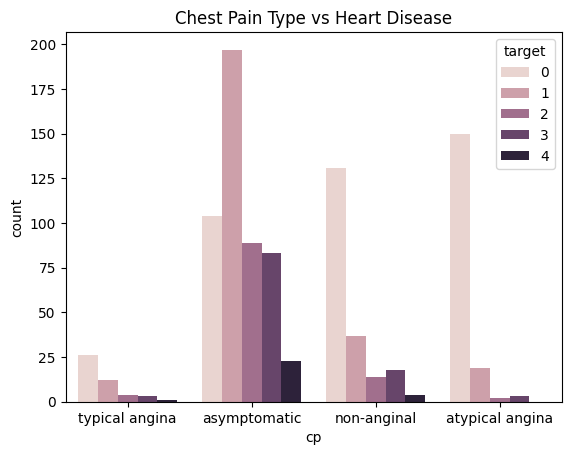

In [25]:
# Example: Heart disease vs Chest Pain Type
sns.countplot(x='cp', hue='target', data=data)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


RuntimeError: Can not put single artist in more than one figure

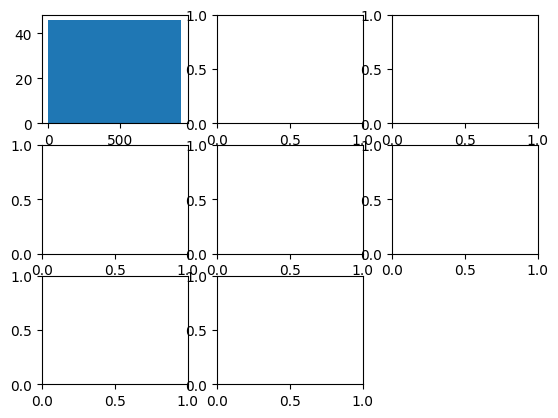

In [31]:
#numerical data plots
data.hist(figure=(12,10),bins=20)
plt.tight_layout()
plt.show()

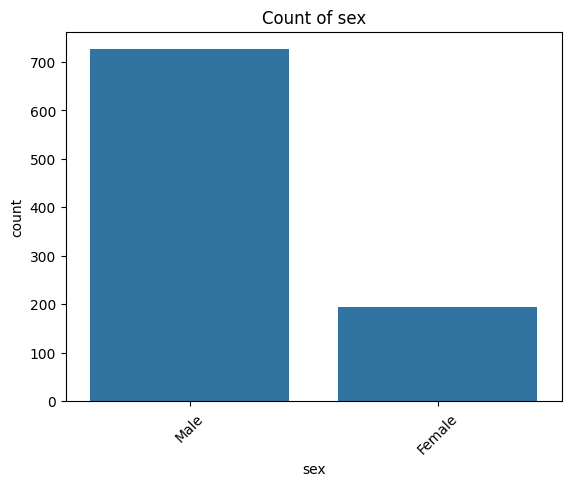

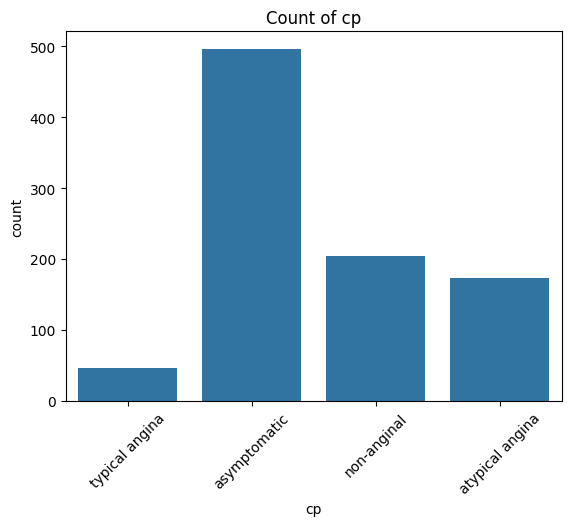

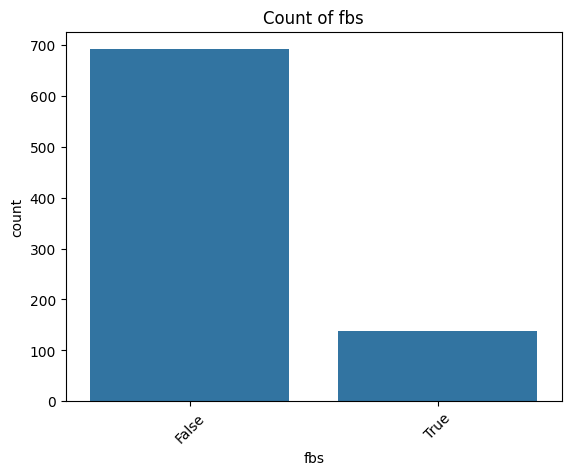

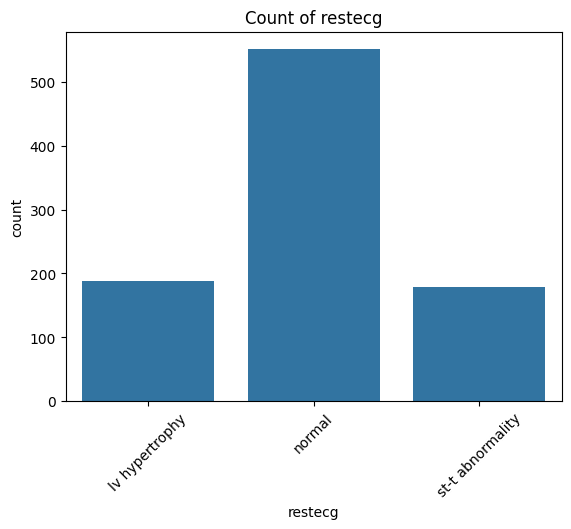

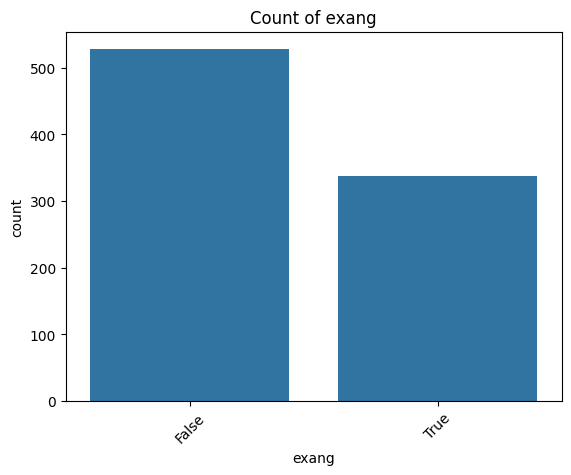

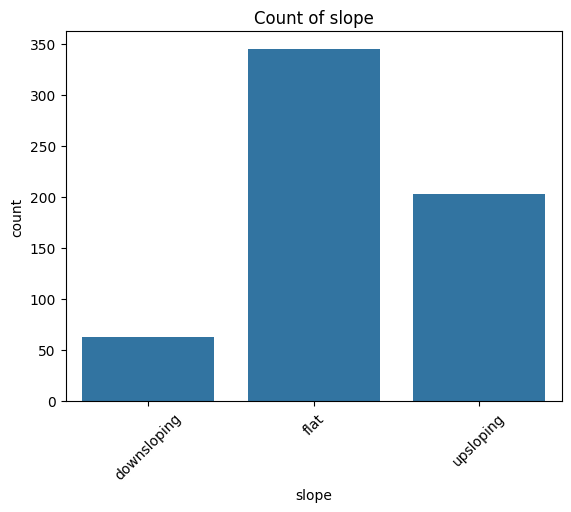

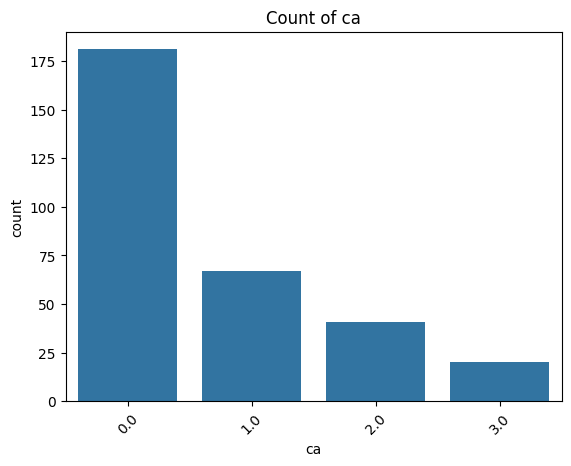

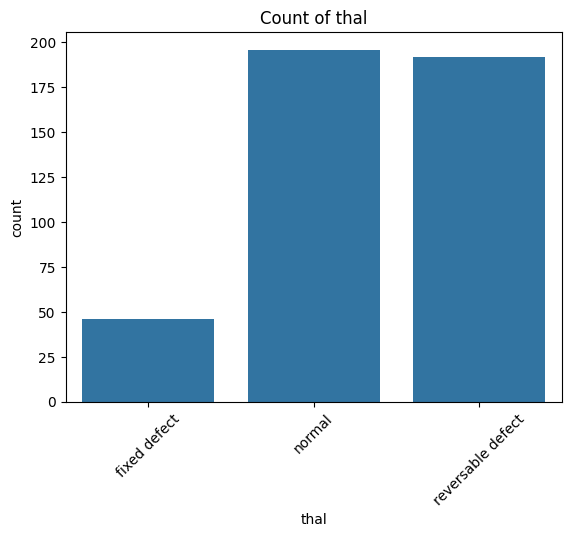

In [32]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical:
    sns.countplot(x=col,data=data)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [33]:
#check correlation between features and target
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 1200x800 with 0 Axes>